## an Empirical Blend Boosting Study for Home Credit Default Risk 
### **(as my first notebook share on Kaggle)

During Jan-Apr of 2021 I have attended an intense bootcamp program focusing mainly on Data Science and Machine Learning. The bootcamp is organized by VBO (https://www.veribilimiokulu.com/), and I would like to thanks to the VBO Team (especially Mustafa Vahit Keskin, Attilla Yardimci and my group members).

The Home Credit Default Risk dataset on the Kaggle is subjected as final project of the bootcamp, and I have spent a period of three weeks on this project personally and also with my sub-team members. I developed various models and quite a large number of them having AUC scores better than 0.8 ( highest one 0.8034). Unfortunately, I could not run any full version of my models on Kaggle because of insufficient RAM issue even though datasets are zipped to almost 4 times by integer/float dtype conversion on my datasets.  

After a while I recognize that some Kagglers had already shared their distinctly combined blending performances on a bunch of submitted results from their different type of models. Thanks to their inspiration about this approach, which is completely associate to boosting strategy: "weaker predictors turns to be much stronger one". Therefore, I titled this study as "an Empirical Blend Boosting" **(a quite unique naming :)**. Here I would like to share you my boosted blending performance based on my +20 results having better than 0.802 AUC score and other +30 results having AUC score between 0.802 and 0.800. However, I do not used yet the second set of my submission results because just ~25 of them is enough to achieve the best result on the Kaggle :), and also it is a quite boring stuff to try possible linear combinations. On the other hand, I can aggressively enhance my AUC score, but I could not convince myself yet that blending is a meaningful thing for data science philosophy.   

Mostly I use Colab Pro to compute LigthGBM calculations with 5-fold CV on GPUs. My models have 900-1800 features. I am also developing a micro model having less than 200 features with a 0.800 AUC score (as a future mission for me). Soon I will share my micro model on the Kaggle, there should be no problem about RAM usage :-).  

I have a limited knowledge about the credit finance, therefore, I combined many Kaggle notebooks for expending number of features as much as I desire and/or acceptance of my LigthGBM models harvesting further enhance scores. I would like to thank these contributors. 

Some of them are listed here (sorry for missings): 
* https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features <=-- my models are based on this study
* https://www.kaggle.com/jsaguiar/lightgbm-7th-place-solution
* https://www.kaggle.com/sangseoseo/oof-all-home-credit-default-risk <=-- in most cases these hyperparameters are used
* https://www.kaggle.com/ashishpatel26/different-basic-blends-possible <=-- thank for blending idea
* https://www.kaggle.com/mathchi/home-credit-risk-with-detailed-feature-engineering
* https://www.kaggle.com/windofdl/kernelf68f763785
* https://www.kaggle.com/meraxes10/lgbm-credit-default-prediction
* https://www.kaggle.com/luudactam/hc-v500
* https://www.kaggle.com/aantonova/aggregating-all-tables-in-one-dataset
* https://www.kaggle.com/wanakon/kernel24647bb75c


In [1]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# load submitted 22 results having my best AUC scores better than 0.802 
df_subs = pd.read_csv('../input/homecredit-best-subs/df_subs_3.csv')
df_subs.iloc[:, :12].head()

,SK_ID_CURR,0,1,2,3,4,5,6,7,8,9,10
0,100001,0.037693,0.038579,0.036918,0.037693,0.039752,0.026068,0.020614,0.030581,0.030192,0.030527,0.029856
1,100005,0.417600,0.422508,0.413305,0.417600,0.419516,0.585240,0.660785,0.109038,0.113087,0.115120,0.111054
2,100013,0.048403,0.045182,0.051221,0.048403,0.039651,0.018910,0.013415,0.042591,0.041888,0.041691,0.042084
3,100028,0.031664,0.031586,0.031732,0.031664,0.029225,0.017662,0.012486,0.035754,0.034865,0.034670,0.035060
4,100038,0.387950,0.398390,0.378815,0.387950,0.404362,0.800392,0.873908,0.151162,0.153156,0.153718,0.152595


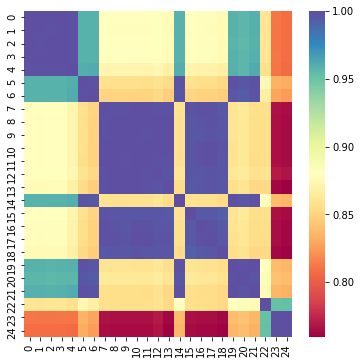

In [2]:
# check correlation map between these 22 best AUC scores
plt.figure(figsize=(6,6))
sns.heatmap(df_subs.iloc[:,1:].corr(), cmap='Spectral')
plt.show()

#### From correlation map there it is clear that there are 3 subgroups. We should firstly scale these groups their inner side, and then among of themselves.    

In [3]:
# create a submission dataset
avg_bleand_1 = pd.DataFrame()
avg_bleand_1['SK_ID_CURR'] = df_subs['SK_ID_CURR']

# create a linear combination between 22 individual results 
# coefficients determine empirically and based on correlational interactions 
avg_bleand_1['TARGET'] = 1.0 * (6 * (df_subs['0'] + df_subs['1'] + df_subs['2'] + df_subs['3'] + 2 * df_subs['4']) / 6 +
                         3 * (5 * df_subs['5'] + 7 * df_subs['6'] + 1 * df_subs['14'] + 3 * df_subs['19'] + 2 * df_subs['20'] + 4 * df_subs['21']) / 22 +
                        25 * (df_subs['7'] + df_subs['8'] + df_subs['9'] + df_subs['10'] + df_subs['11'] + df_subs['12'] + 2 *
                             df_subs['13'] + 4 * df_subs['15'] + 2 * df_subs['16'] + 2 * df_subs['17'] + 4 * df_subs['18']) / 20) / 34

avg_bleand_1.head()

,SK_ID_CURR,TARGET
0,100001,0.032043
1,100005,0.211708
2,100013,0.040014
3,100028,0.033279
4,100038,0.259602


In [4]:
# create the submission file with my first blend result: 0.80602 AUC score
avg_bleand_1.to_csv('submission_806.csv', index=False)

In [5]:
df_subs['25'] = avg_bleand_1['TARGET']
#df_subs.to_csv('df_subs.csv', index=False)

In [6]:
avg_bleand_2 = avg_bleand_1.copy()
#blend some other notebook files
avg_bleand_2['TARGET'] = 1.0*(7*df_subs['22'] + 12*df_subs['23'] + 16*df_subs['24'] - 5*df_subs['25'] ) / 31
# create the submission file with my first blend result: AUC score is better than 0.811
avg_bleand_2.to_csv('submission_final.csv', index=False)